# SVM on the Digits Dataset SOL

### Imports and Prep

In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd

from IPython.display import Image

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
digits = datasets.load_digits()
print(digits.data.shape) 

(1797, 64)


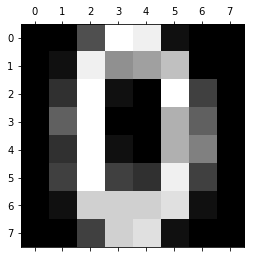

In [4]:
plt.gray()
plt.matshow(digits.images[166])
plt.show()

In [5]:
# Image(filename='digits.png') 

In [6]:
X_centered = digits.data - digits.data.mean()
y = digits.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.5,random_state=42)

In [8]:
pd.Series(y_train).value_counts()

0    96
2    94
1    93
7    92
8    91
3    90
9    88
4    88
6    83
5    83
dtype: int64

# Principle Component Analysis

In [9]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pcafeatures_train = pca.transform(X_train)

In [11]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

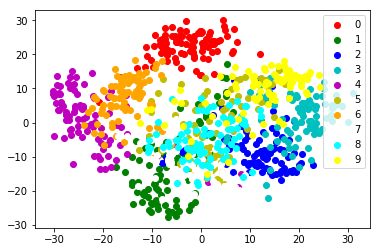

In [12]:
plot_PCA_2D(pcafeatures_train, target=y_train, target_names=digits.target_names)

# Fitting Linear and RBF SVM Models

In [13]:
# fit linear model
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
# predict out of sample
y_pred = model_svm.predict(X_test)

In [15]:
# check accuracy
accuracy_score(y_test,y_pred)
# pretty good accuracy!

0.97664071190211343

In [16]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[82,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 88,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 83,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 88,  0,  0,  0,  1,  4,  0],
       [ 0,  1,  0,  0, 92,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 96,  0,  1,  0,  2],
       [ 2,  0,  0,  0,  0,  0, 96,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 86,  0,  1],
       [ 0,  2,  0,  0,  2,  1,  0,  1, 77,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 90]])

In [17]:
# fit rbf model
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.001)
model_svm2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# predict out of sample
y_pred2 = model_svm2.predict(X_test)

In [19]:
# check accuracy
accuracy_score(y_test,y_pred2)
# our accuracy improved!

0.98665183537263623

In [20]:
# confusion matrix
confusion_matrix(y_test,y_pred2)

array([[82,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 89,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 83,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 90,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 97,  0,  0,  0,  2],
       [ 1,  0,  0,  0,  0,  1, 96,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 86,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 83,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 88]])